In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from urllib.request import urlopen
import geopandas as gpd
import json
with open(r'C:\Users\amin9\OneDrive - EPITA\Projet 2\projet_ips\departements.geojson') as response:
    counties = json.load(response)
counties["features"][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[3.172704445659, 50.011996744997],
    [3.1821975358417, 50.012335988197],
    [3.2174797791605, 50.023182479597],
    [3.230541907493, 50.031311385584],
    [3.2579143291896, 50.024436966985],
    [3.2581174425539, 50.031770179151],
    [3.2707157754254, 50.029466123914],
    [3.2801699122715, 50.015181662188],
    [3.2870975810209, 50.014184796787],
    [3.3105782894546, 50.019566104726],
    [3.3293480229819, 50.015985397797],
    [3.3371076812771, 50.017403207904],
    [3.3529876206925, 50.035860226771],
    [3.3748529135519, 50.03640787562],
    [3.3915828503565, 50.031901508452],
    [3.39890478116, 50.034755671377],
    [3.4135732928197, 50.027585361882],
    [3.447055807483, 50.022439728958],
    [3.491357082465, 50.018859654652],
    [3.5071388293519, 50.035778426858],
    [3.5286124821151, 50.038180178229],
    [3.530720808825, 50.044704432129],
    [3.5448478994272, 50.053794847201],
    [3.5615293457173

In [3]:
#Dataframe containing ips of high schools in france
ips_df = pd.read_csv("../data/ips.csv", delimiter=";", dtype={"Code departement": str})
#Taking only values we need for map, therefore excluding overseas territories
ips_df = ips_df[ips_df["Code du département"] < 100]

In [4]:
import plotly.express as px

fig = px.choropleth(ips_res_df, geojson=counties, locations='Code departement', color='IPS Ensemble GT-PRO',
                           color_continuous_scale="Viridis",
                           range_color=(0, 200),
                           scope="europe",
                           labels={'IPS':'IPS Ensemble GT-PRO'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: name 'ips_res_df' is not defined

In [15]:
ips_df.columns

Index(['Rentrée scolaire', 'Académie', 'Code du département', 'Département',
       'UAI', 'Nom de l'établissment', 'Code INSEE de la commune',
       'Nom de la commune', 'Secteur', 'Type de lycée', 'IPS voie GT',
       'IPS voie PRO', 'IPS Ensemble GT-PRO', 'Ecart-type de l'IPS voie GT',
       'Ecart-type de l'IPS voie PRO'],
      dtype='object')

In [ ]:
from urllib.request import urlopen
import json
with urlopen('C:/Users/amin9/OneDrive - EPITA/Projet 2/projet_ips/departements-avec-outre-mer.geojson') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("../data/ips.csv",
                   dtype={"fips": str})

import plotly.express as px

fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

URLError: <urlopen error unknown url type: c>

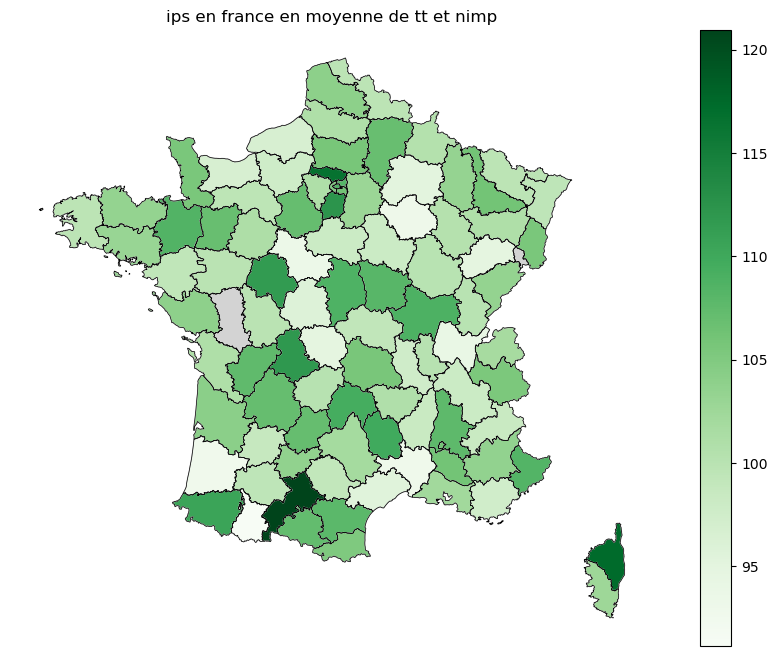

In [14]:
# Charger le fichier GeoJSON des départements français
france_departments = gpd.read_file("../departements.geojson")

# Calculer la moyenne des loyers pour chaque département
df_ips_dom = ips_df.groupby('Code du département')['IPS Ensemble GT-PRO'].mean().reset_index()

# Fusionner le GeoDataFrame des départements avec le DataFrame des loyers moyens
df_ips_dom["Code du département"] = df_ips_dom["Code du département"].apply(str)
merged = france_departments.merge(df_ips_dom, left_on='code', right_on='Code du département', how='left')
merged["IPS Ensemble GT-PRO"] = df_ips_dom["IPS Ensemble GT-PRO"] 

# Créer une carte choroplèthe des loyers moyens par département
fig, ax = plt.subplots(1, figsize=(12, 8))
merged.plot(column='IPS Ensemble GT-PRO', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgrey'})

# Superposer les contours de tous les départements
france_departments.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black')

ax.axis('off')
ax.set_title('ips en france en moyenne de tt et nimp')
plt.show()

In [ ]:
france_departments["code"]

0     02
1     10
2     14
3     15
4     28
      ..
91    41
92    53
93    54
94    79
95    90
Name: code, Length: 96, dtype: object

In [ ]:
df_ips_dom["Code du département"]

0       1.0
1       2.0
2       3.0
3       4.0
4       5.0
      ...  
94    971.0
95    972.0
96    973.0
97    974.0
98    976.0
Name: Code du département, Length: 99, dtype: float64

In [ ]:
merged.head

<bound method NDFrame.head of     code           nom                                           geometry  \
0     02         Aisne  POLYGON ((3.17270 50.01200, 3.18220 50.01234, ...   
1     10          Aube  POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...   
2     14      Calvados  POLYGON ((-1.11962 49.35557, -1.11503 49.36240...   
3     15        Cantal  POLYGON ((2.50841 45.47850, 2.52444 45.48070, ...   
4     28  Eure-et-Loir  POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...   
..   ...           ...                                                ...   
192  NaN           NaN                                               None   
193  NaN           NaN                                               None   
194  NaN           NaN                                               None   
195  NaN           NaN                                               None   
196  NaN           NaN                                               None   

    Département  IPS Ensemble GT-PRO  
0     

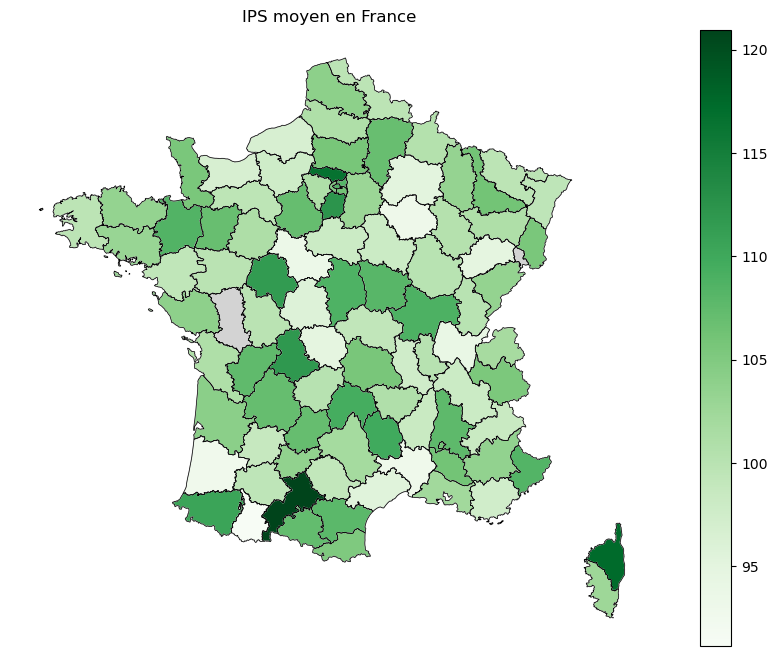

In [23]:
# Charger le fichier GeoJSON des départements français
france_departments = gpd.read_file("../departements.geojson")

# Calculer la moyenne des loyers pour chaque département
df_ips_dom = ips_df.groupby('Code du département')['IPS Ensemble GT-PRO'].mean().reset_index()

#Transform into str values to match with str values in france_departements to merge later
df_ips_dom["Code du département"] = df_ips_dom["Code du département"].apply(str)

# Fusionner le GeoDataFrame des départements avec le DataFrame des loyers moyens
merged = france_departments.merge(df_ips_dom, left_on='code', right_on='Code du département', how='left')
merged["IPS Ensemble GT-PRO"] = df_ips_dom["IPS Ensemble GT-PRO"] 

# Créer une carte choroplèthe des loyers moyens par département
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column='IPS Ensemble GT-PRO', cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, missing_kwds={'color': 'lightgrey'})

# Superposer les contours de tous les départements
france_departments.boundary.plot(ax=ax, linewidth=0.5, edgecolor='black')

ax.axis('off')
ax.set_title('IPS moyen en France ')
plt.show()